# Loan Approval Prediction using Random Forest Classifier

A random forest is a supervised machine learning technique that’s used to solve regression and classification problems.

It utilizes ensemble learning, which is a technique that combines many classifiers to provide solutions to complex problems.

A random forest algorithm consists of many decision trees. The ‘forest’ generated by the random forest algorithm is trained through bagging or bootstrap aggregating. Bagging is an ensemble meta-algorithm that improves the accuracy of machine learning algorithms.

The (random forest) algorithm establishes the outcome based on the predictions of the decision trees. It predicts by taking the average or mean of the output from various trees. Increasing the number of trees increases the precision of the outcome.

A random forest eradicates the limitations of a decision tree algorithm. It reduces the overfitting of datasets and increases precision. It generates predictions without requiring many configurations in packages (like scikit-learn).

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Load the data

In [139]:
df = pd.read_csv('https://github.com/robitussin/CCMACLRL/blob/ddf33f8d0075132f8f963f90116ff008f60fcd63/9%20-%20Ensemble%20Learning%20and%20Random%20Forest/implementation/loanstatus.csv?raw=True')

## Explore the data

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [141]:
df['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


## Pre-process the data

In [142]:
# Encoding :
df["Gender"] = df["Gender"].map({"Male" : 1 , "Female" : 0})
df['Married'] = df['Married'].map({"Yes" : 1 , "No" : 0})
df['Education'] = df['Education'].map({'Graduate': 1 , 'Not Graduate' : 0})
df['Dependents'].replace('3+' ,3 , inplace=True)
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1 , 'No': 0})
df['Property_Area'] = df['Property_Area'].map({'Semiurban' : 1 , 'Urban': 2 , 'Rural': 3})
df['Loan_Status'] = df['Loan_Status'].map({'Y' : 1 , 'N' : 0})

<ipython-input-142-cd8ff8b5db63>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].replace('3+' ,3 , inplace=True)


### Check for Null Values

In [143]:
# Null Values Imputation
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


### Replace null values

In [144]:
columns_with_null = ['Gender','Married','Dependents','Self_Employed','Credit_History','LoanAmount','Loan_Amount_Term']

In [145]:
df[columns_with_null] = df[columns_with_null].replace({np.nan:df['Gender'].mode(),
                                   np.nan:df['Married'].mode(),
                                   np.nan:df['Dependents'].mode(),
                                   np.nan:df['Self_Employed'].mode(),
                                   np.nan:df['Credit_History'].mode(),
                                   np.nan:df['LoanAmount'].mean(),
                                   np.nan:df['Loan_Amount_Term'].mean()})

In [146]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


## Split the data

In [147]:
X = df.drop(columns=['Loan_ID','Loan_Status']).values
y = df['Loan_Status'].values

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Feature Scaling

In [149]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train and Evaluate the Random Forest Model

In [150]:
model = RandomForestClassifier(criterion = 'gini')
model.fit(X_train_scaled, y_train)

# Evaluating on Training set
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.43      0.51        51
           1       0.81      0.90      0.85       134

    accuracy                           0.77       185
   macro avg       0.71      0.66      0.68       185
weighted avg       0.75      0.77      0.75       185



## Extract the importance of each feature from our Random Forest Model

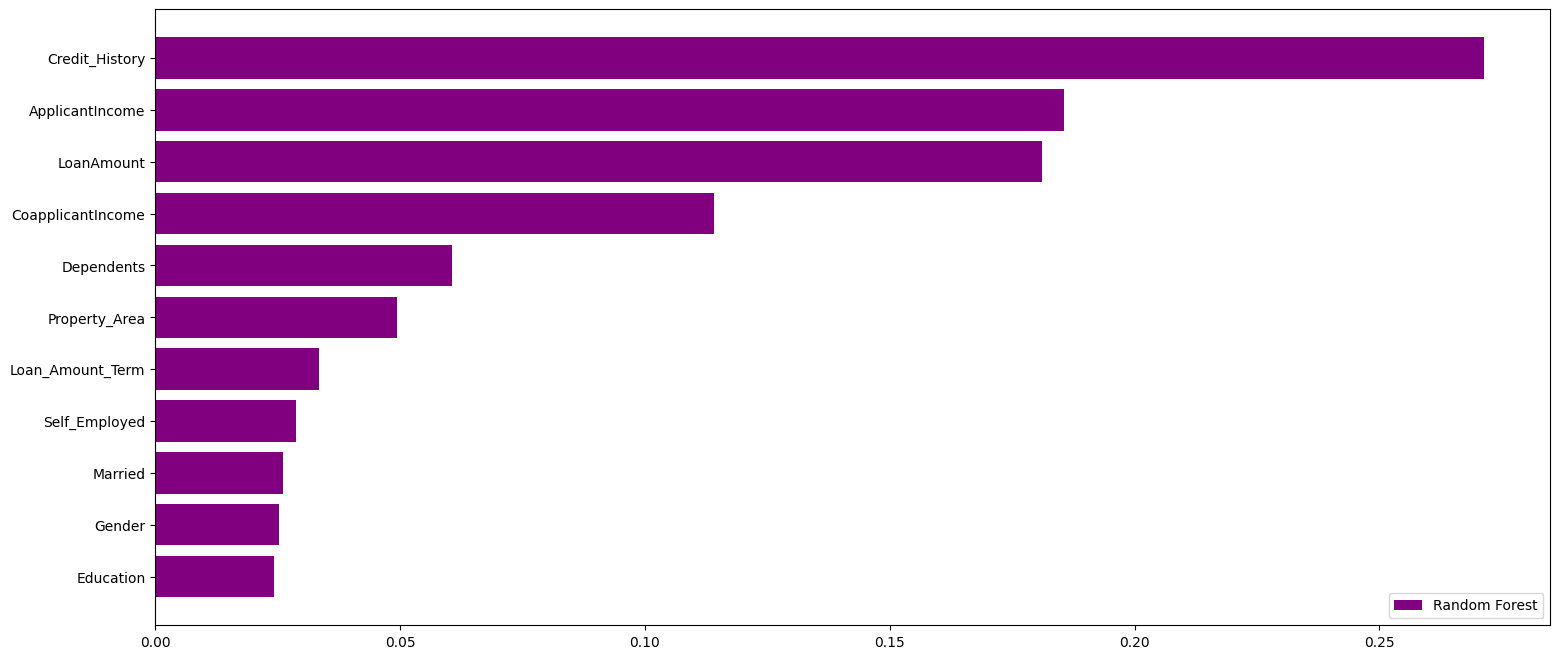

In [151]:
feature_importance = pd.DataFrame({'rfc':model.feature_importances_}, index = df.drop(columns = ['Loan_ID','Loan_Status']).columns)
feature_importance.sort_values('rfc',ascending = True,inplace = True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize = (18,8))
rfc_feature = ax.barh(index, feature_importance['rfc'], color = 'purple', label = 'Random Forest')
ax.set(yticks = index , yticklabels = feature_importance.index)

ax.legend()
plt.show()